In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\AppData\Local\Temp\ipykernel_45500\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head(10)

,Feature_1,Feature_2,Feature_3,Output
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647
5,-0.889889,-1.580945,-0.422793,-77.897356
6,-2.685109,0.018421,1.722669,-75.231606
7,0.663188,0.185268,-1.883424,-57.492711
8,0.319196,-2.983970,-1.515216,-54.176286
9,-0.348368,-1.811019,0.746892,29.469835


In [4]:
x = df.iloc[:,0:3].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [7]:
# Doing Prediction
y_pred = model.predict(X_test)

## 1. Linear Relationship

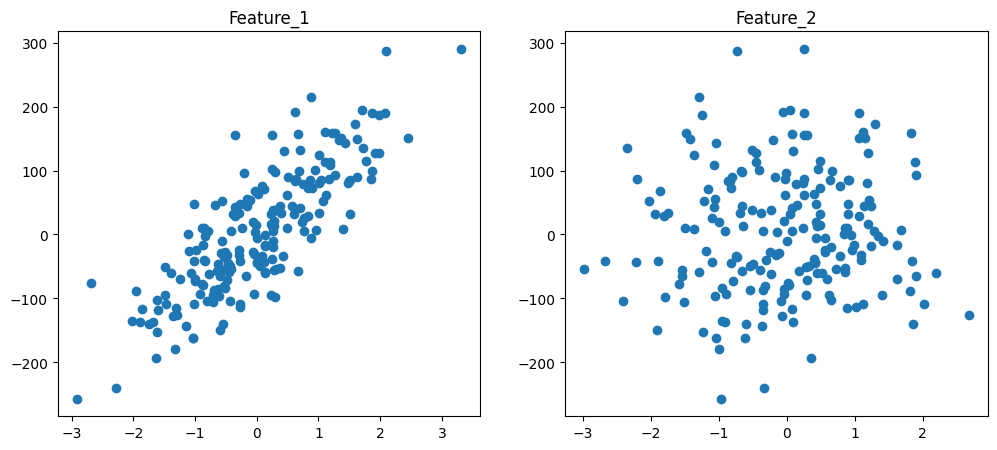

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(df['Feature_1'], df['Output'])
ax1.set_title("Feature_1")
ax2.scatter(df['Feature_2'], df['Output'])
ax2.set_title("Feature_2")

plt.show()

## 2. MultiCollinearity

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(3):
    vif.append(variance_inflation_factor(X_train, i))

In [10]:
for i in range(0,3):
    print(f" Vif value of Feature_{i+1} = {vif[i]}")

 Vif value of Feature_1 = 1.0103257033260722
 Vif value of Feature_2 = 1.0098710800647828
 Vif value of Feature_3 = 1.013950197312255


## Caculating Residuals

In [11]:
residuals = y_test - y_pred

## 3. Normality of Residuals

Text(0.5, 1.0, 'Distribution of Residuals')

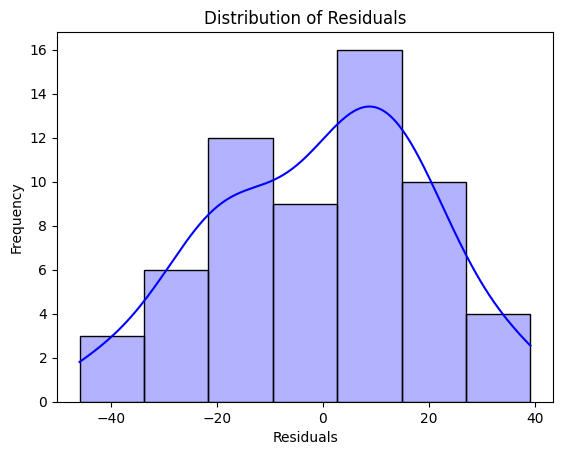

In [12]:
sns.histplot(residuals, kde=True, color='blue', alpha=0.3)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')


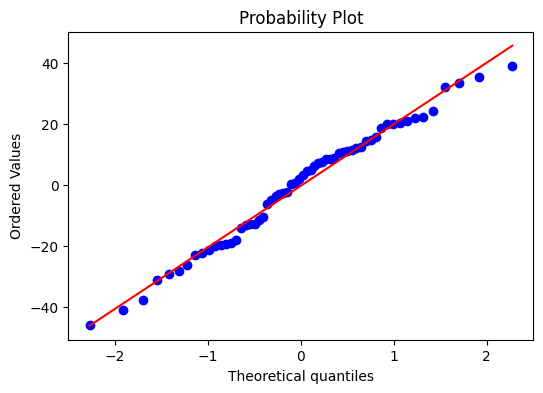

In [13]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residuals, plot=ax, fit=True)

plt.show()

## 4. Homoscedasticity

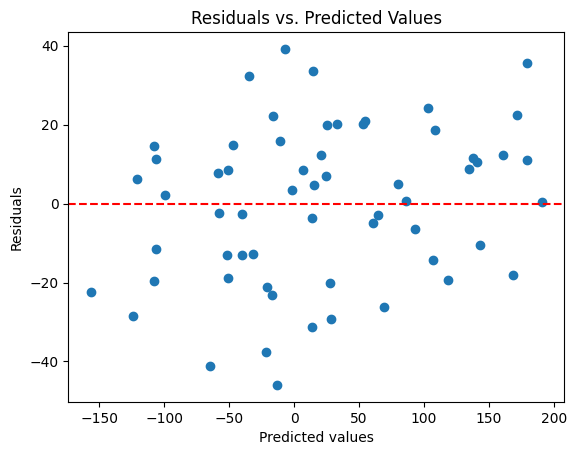

In [14]:
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

## 5. Independence of Error (Residuals)

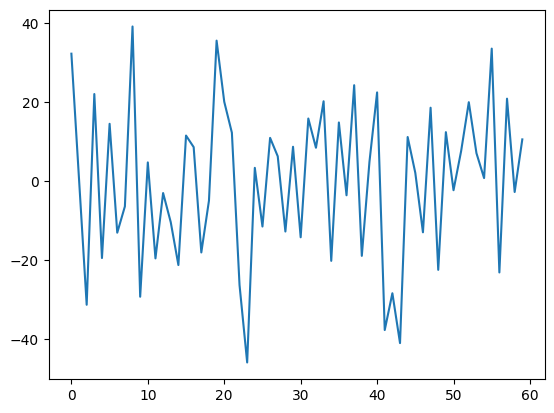

In [15]:
plt.plot(residuals)